In [80]:
import sys
import pandas as pd
from datetime import datetime
sys.path.insert(0, './Moduulit')
pd.options.mode.chained_assignment = None
# Importtaus tässä muodossa
from database_connection import database_query
from outliers import find_outliers, draw_histogram
from clean_dataframe import clean_dataframe
from write_df_to_database import write_df_to_mariadb
from xy_diskretisointi import xy_to_grid
from isolation_forest import *
from sisään_uloskäynnit import *
from clean_velocities import *

# tai from ... import *


# Jos datasetti on "df"

# Esim. find_outliers(df)
# Esim. draw_histogram(df['x'], df['y'], 20) <-- kolmas meinaa bins arvoa, eli histogrammin "rakeisuutta"

In [81]:

df = pd.read_csv('/home/jovyan/work/projekti-2-team-fox/laurijutut/projekti2.csv')
df

,Unnamed: 0,node_id,timestamp,x,y,z,q
0,0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0
...,...,...,...,...,...,...,...
13890901,13890901,b'4996252679627069957',b'2020-06-01 03:00:05.469336+00:00',635,1064,0,0
13890902,13890902,b'4996252679627069957',b'2020-06-01 03:00:06.47926+00:00',681,760,0,0
13890903,13890903,b'4996252679627069957',b'2020-06-01 03:00:08.507118+00:00',622,991,0,0
13890904,13890904,b'4996252679627069957',b'2020-06-01 03:00:09.547553+00:00',644,1066,0,0


In [82]:
%%time
df = df.sort_values(by='timestamp', ascending=True)

CPU times: user 10.8 s, sys: 276 ms, total: 11.1 s
Wall time: 11.1 s


In [83]:
%%time
df_new = clean_dataframe(df)

CPU times: user 2min 19s, sys: 4.32 s, total: 2min 24s
Wall time: 2min 23s


In [84]:
df_new = df_new.reset_index(drop=True)

In [145]:
dfdf = df_new

In [86]:
dfdf

,index,Unnamed: 0,node_id,timestamp,x,y
0,12502166,12502166,1,2020-05-05 20:48:36.098,250,528
1,12502167,12502167,1,2020-05-05 20:48:40.096,228,528
2,12502168,12502168,1,2020-05-05 20:50:13.096,212,540
3,12502169,12502169,1,2020-05-05 20:50:15.096,209,533
4,12502170,12502170,1,2020-05-05 20:50:17.099,186,528
...,...,...,...,...,...,...
11824669,5262600,5262600,4,2020-10-23 09:57:49.372,187,3999
11824670,11869220,11869220,14,2020-10-23 09:57:49.989,2790,-300
11824671,583873,583873,24,2020-10-23 09:57:50.989,2773,-369
11824672,1210149,1210149,26,2020-10-23 09:57:54.758,1301,-9


In [164]:
dfdf.timestamp = dfdf['timestamp'].dt.normalize()
muuttuja  = dfdf.timestamp.value_counts().sort_index()


In [180]:
muuttuja.index.value_counts().sum()

149

In [179]:
days = pd.date_range(start='5/5/2020', end='23/10/2020')
days.value_counts().sum()


172

In [166]:
uusi = muuttuja.reindex(days)

In [167]:
uusi


2020-05-05      129.0
2020-05-06        NaN
2020-05-07        NaN
2020-05-08        NaN
2020-05-09        NaN
               ...   
2020-10-19    44850.0
2020-10-20    45441.0
2020-10-21    53531.0
2020-10-22    48846.0
2020-10-23     4751.0
Freq: D, Name: timestamp, Length: 172, dtype: float64

In [181]:
uusi.isnull().sum()

23

Text(0.5, 1.0, 'Kaupassa liikehdintä ja puuttuvat päivät')

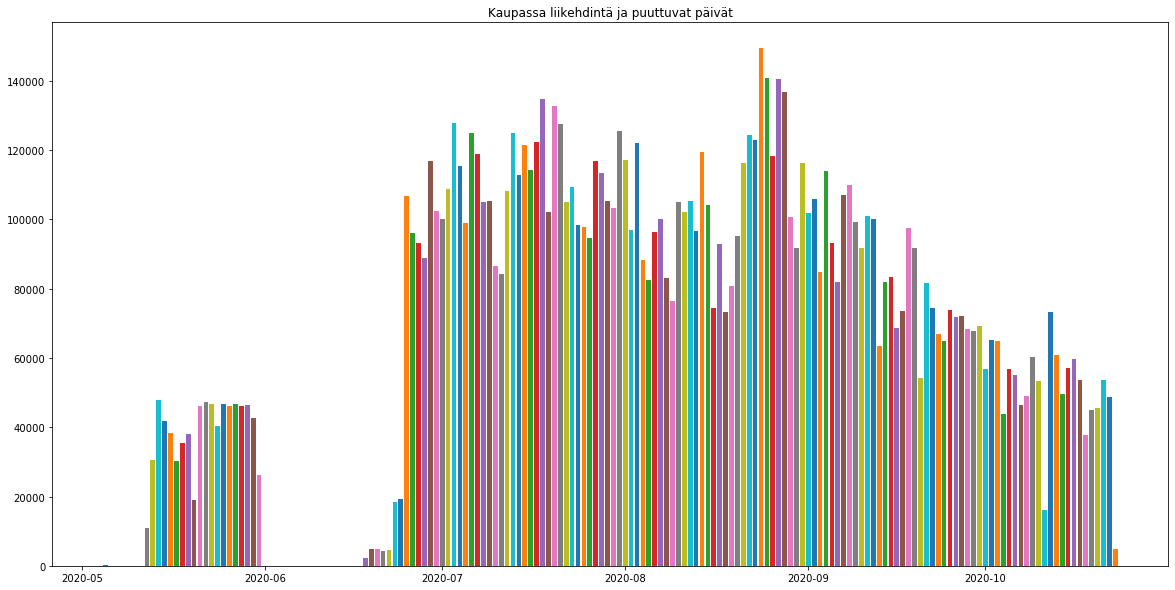

In [176]:
plt.figure(figsize=(20,10))
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)
plt.bar(uusi.index, uusi, color=colors)
plt.title('Kaupassa liikehdintä ja puuttuvat päivät')